In [1]:
#Para resolver uma incompatibilidade entre a versão do scikit-learn (sklearn) e a versão do imbalanced-learn (imblearn)

!pip install -U imbalanced-learn==0.8.0

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
# Carregar os dados do link
url = "https://www.dropbox.com/s/z8nw6pfumdw3bb9/breast-cancer-wisconsin.csv?raw=1"
df = pd.read_csv(url)

In [5]:
# Eliminar uma coluna com erro
df.drop('Unnamed: 32', axis=1, inplace=True)

In [6]:
# Separar as variáveis independentes da variável alvo
X = df.drop(['diagnosis', 'id'], axis=1)
y = df['diagnosis']


In [7]:
# Label encoder na variável alvo
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0, 0.5, 'Contagem')

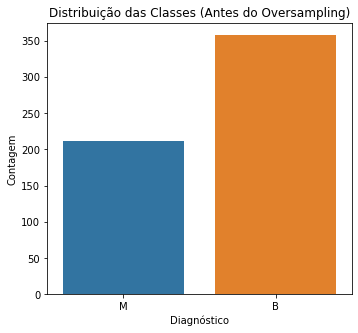

In [9]:
# Visualizar a distribuição das classes antes do oversampling
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='diagnosis', data=df)
plt.title('Distribuição das Classes (Antes do Oversampling)')
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')

In [10]:
# Aplicar Random Oversampling
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

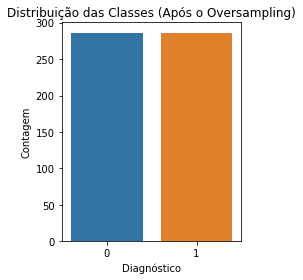

In [11]:
# Visualizar a distribuição das classes depois do oversampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Distribuição das Classes (Após o Oversampling)')
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

In [12]:
# Criar um modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=20)

In [13]:
# Treinar o modelo com os dados de treinamento balanceados
model.fit(X_resampled, y_resampled)


DecisionTreeClassifier(random_state=20)

In [14]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [15]:
# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.95


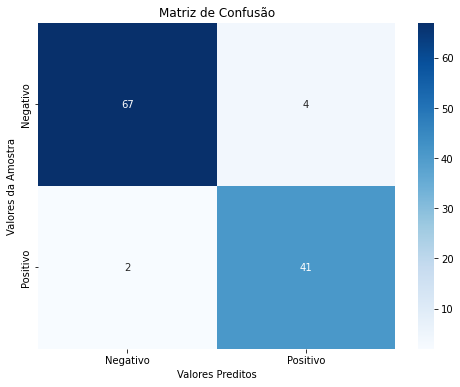

In [16]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão em um gráfico de calor (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negativo', 'Positivo'], 
            yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Valores Preditos')
plt.ylabel('Valores da Amostra')
plt.title('Matriz de Confusão')
plt.show()

In [17]:
# Padronizar as colunas numéricas
X = StandardScaler().fit_transform(X)

In [18]:
# Label encoder na variável alvo
y = LabelEncoder().fit_transform(y)


In [19]:
# Você também pode imprimir a matriz de confusão e outros indicadores de desempenho, se necessário
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(report)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        71
           1       0.91      0.95      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [20]:
model.score(X_train,y_train)

1.0

In [21]:
#Retorna a precisão média do modelo nos dados de teste, que é a proporção de previsões corretas
model.score(X_test, y_test)

0.9473684210526315